Load Dataset

In [201]:
import pandas as pd
import numpy as np

dataframe = pd.read_csv("adult.data")

Check DF dimensions

In [202]:
dataframe.shape

(32560, 15)

In [203]:
dataframe.head()


,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [204]:
dataframe.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [205]:
colnames = [
    "Age",
    "Workclass",
    "Fnlwgt",
    "Education",
    "Education Num",
    "Marital Status",
    "Occupation",
    "Relationship",
    "Race",
    "Sex",
    "Capital Gain",
    "Capital Loss",
    "Hours Per Week",
    "Native Country",
    "Income"
]

dataframe.columns = colnames

In [206]:
#check for null values
dataframe.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education Num     0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours Per Week    0
Native Country    0
Income            0
dtype: int64

In [207]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
Age               32560 non-null int64
Workclass         32560 non-null object
Fnlwgt            32560 non-null int64
Education         32560 non-null object
Education Num     32560 non-null int64
Marital Status    32560 non-null object
Occupation        32560 non-null object
Relationship      32560 non-null object
Race              32560 non-null object
Sex               32560 non-null object
Capital Gain      32560 non-null int64
Capital Loss      32560 non-null int64
Hours Per Week    32560 non-null int64
Native Country    32560 non-null object
Income            32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [208]:
df = dataframe
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
catdf = df.select_dtypes(exclude=numerics)
numdf = df.select_dtypes(include=numerics)

In [209]:
#obtain categorical and numerical columns
catcols = catdf.columns
numcols = numdf.columns

In [210]:
df.duplicated().value_counts()

False    32536
True        24
dtype: int64

In [211]:
#number of duplicates
len_dfDup = len(df[df.duplicated()])
dfDup = df[df.duplicated()]
print(len_dfDup)
dfDup

#number of duplicated rows including original
# dpDup2 = df[df.duplicated(keep = False)]
# len(dpDup2)

df = df.drop_duplicates()
df

24


,Age,Workclass,Fnlwgt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours Per Week,Native Country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [214]:
#drop education column (using education number)
df.drop(['Education'], axis = 1, inplace = True)
df.head()

,Age,Workclass,Fnlwgt,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours Per Week,Native Country,Income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [170]:
#percentage of people who are below 50k
df['Income'].value_counts()
LT50K = df['Income'].value_counts()[0]
GT50K = df['Income'].value_counts()[1]
Perc_LT50K = (LT50K/df.shape[0]) * 100
Perc_GT50K = (GT50K/df.shape[0]) * 100
print('Percentage of people less than or equal 50k salary', Perc_LT50K)
print('Percentage of people greater than 50k salary', Perc_GT50K)


Percentage of people less than or equal 50k salary 75.90668797639538
Percentage of people greater than 50k salary 24.093312023604625


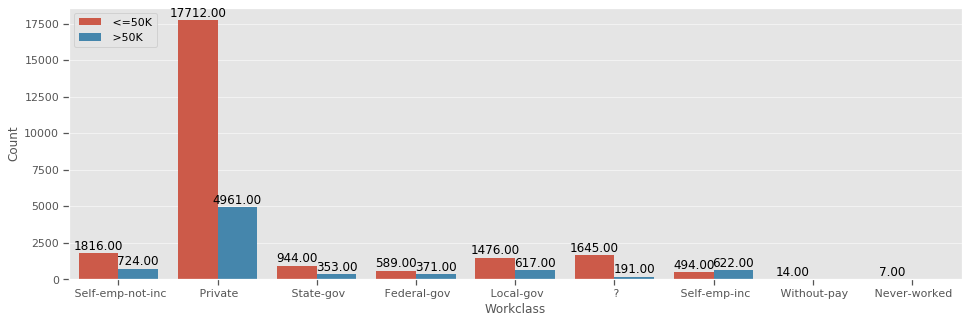

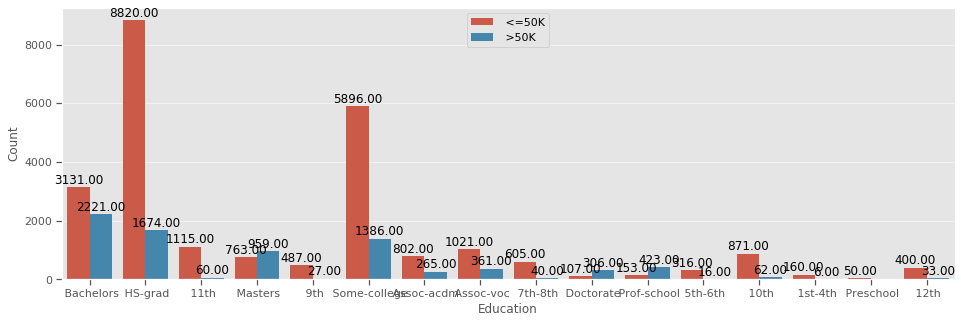

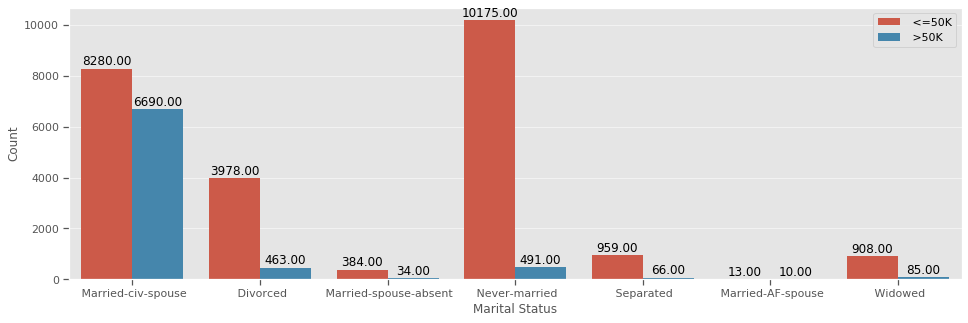

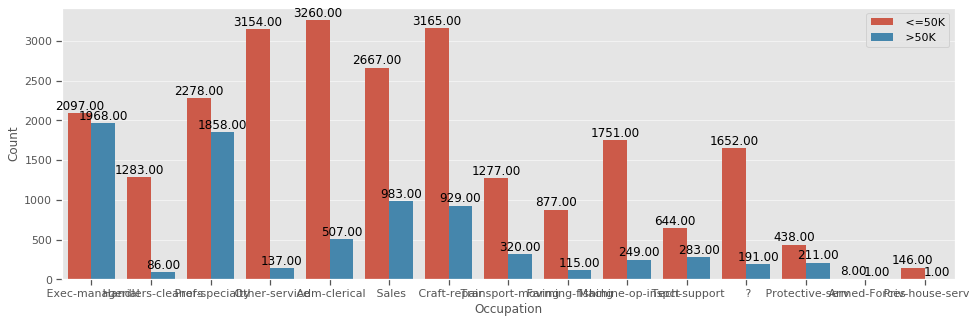

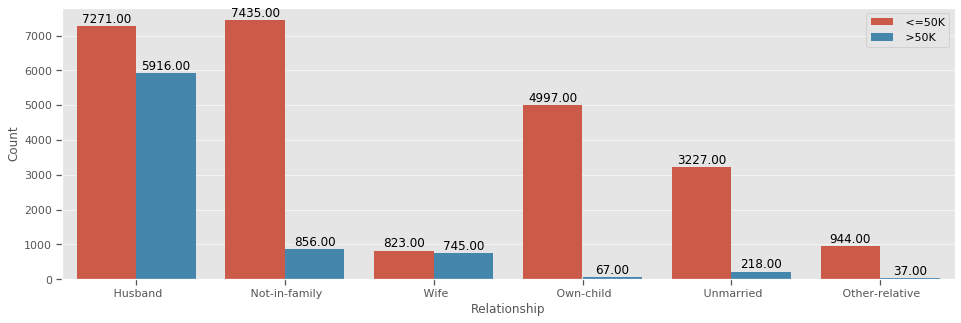

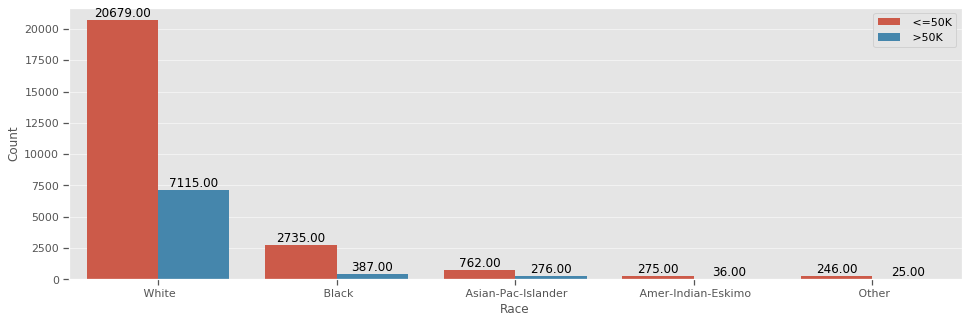

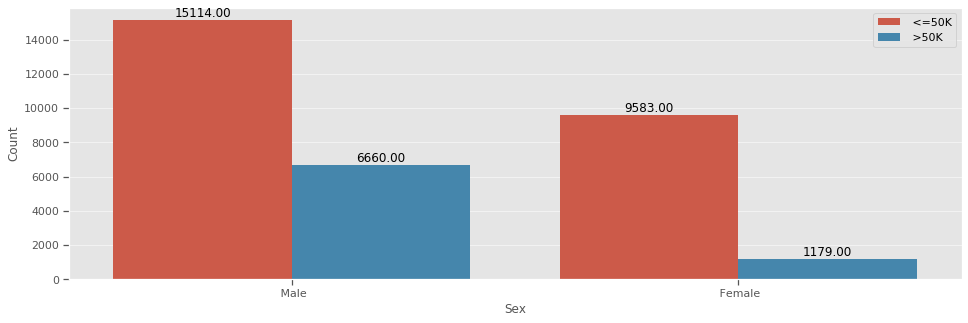

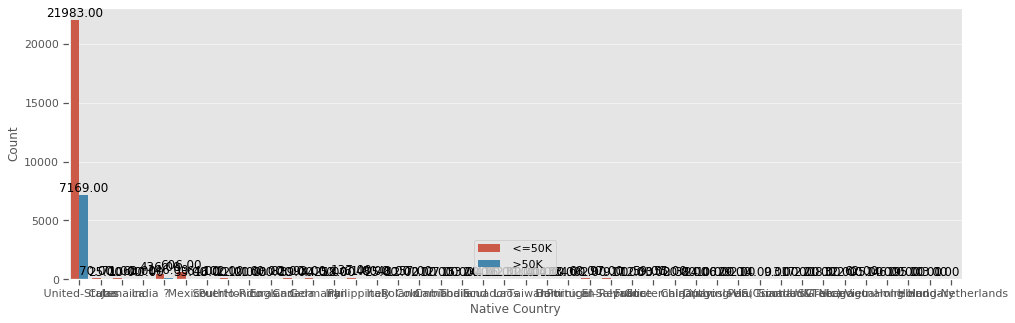

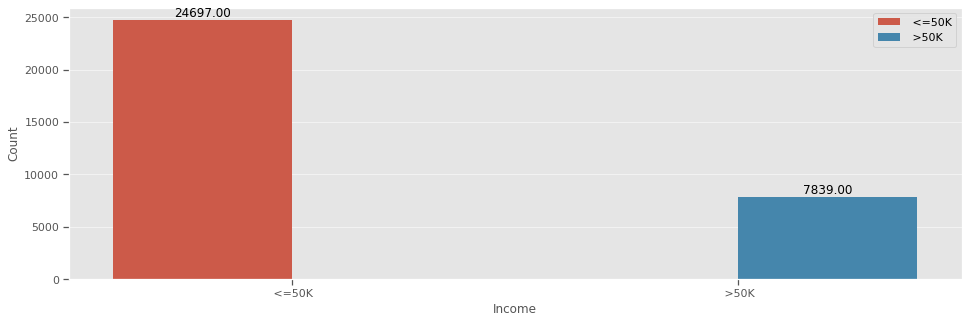

In [149]:
for col in catcols:
    plt.figure(figsize=(16,5))
#     plt.style.use('seaborn-colorblind')
    plt.style.use('ggplot')
    sns.set_context("notebook")
    plt.grid(True, alpha=0.5)
    splot = sns.countplot(x = col, hue = 'Income', data = df)
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 7), textcoords = 'offset points')
#     sns.countplot(df.loc[df['Income'] == ' <=50K', col], label = '<= than $50k')
#     sns.countplot(df.loc[df['Income'] == ' >50K', col], label = '> than $50k')
    plt.xlabel(col)
#     plt.xlim(left=0)
    plt.ylabel('Count')
    plt.legend()
    plt.show()
#     plt.title(col, ' by Income Status'); 

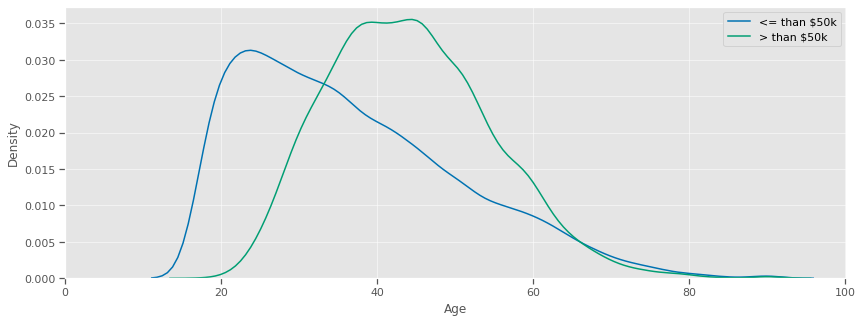

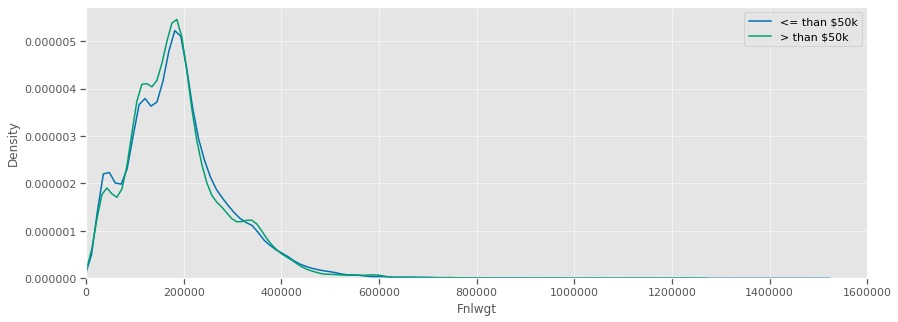

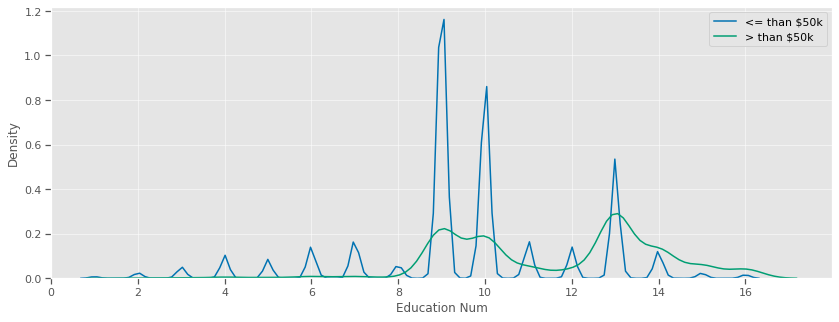

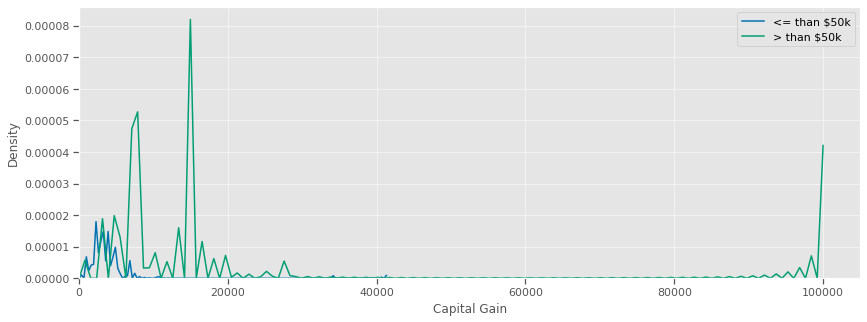

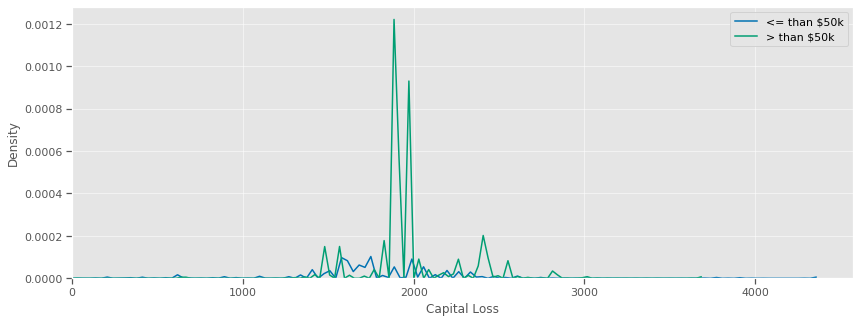

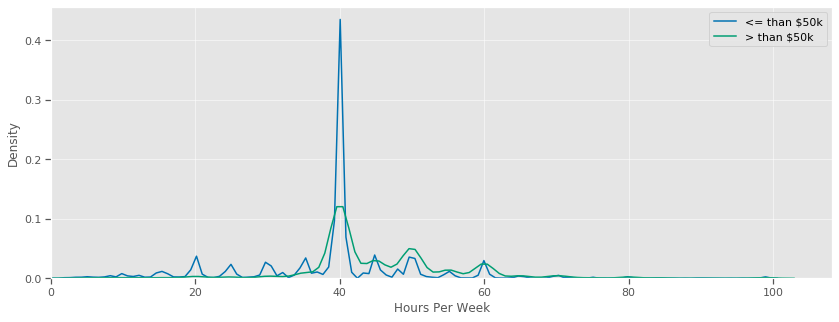

In [150]:
#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
for col in numcols:
    plt.figure(figsize=(14,5))
    plt.style.use('seaborn-colorblind')
    sns.set_context("notebook")
    plt.grid(True, alpha=0.5)
    sns.kdeplot(df.loc[df['Income'] == ' <=50K', col], label = '<= than $50k')
    sns.kdeplot(df.loc[df['Income'] == ' >50K', col], label = '> than $50k')
    plt.xlabel(col)
    plt.xlim(left=0)
    plt.ylabel('Density')
    plt.legend()
    plt.show()
#     plt.title(col, ' by Income Status');

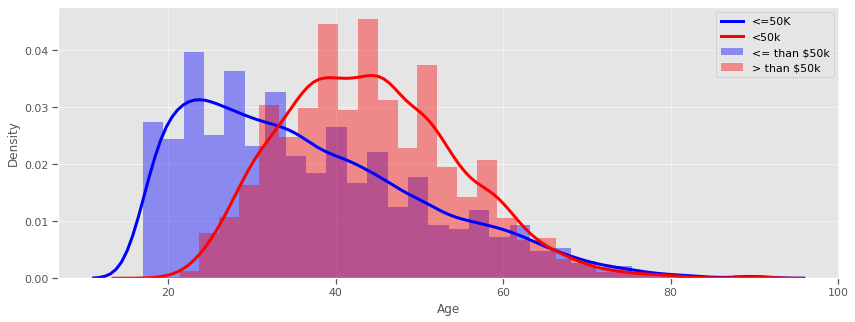

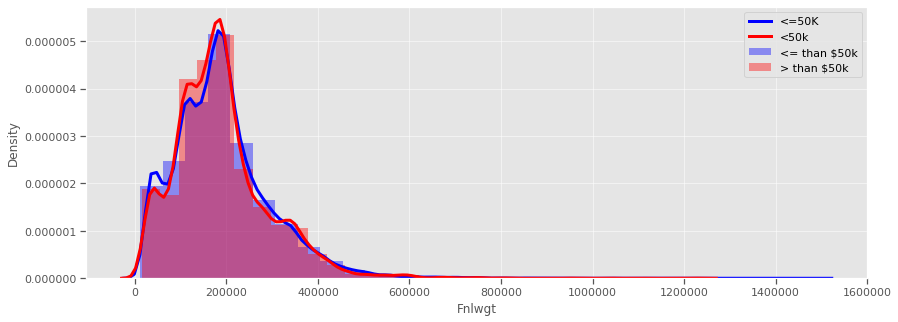

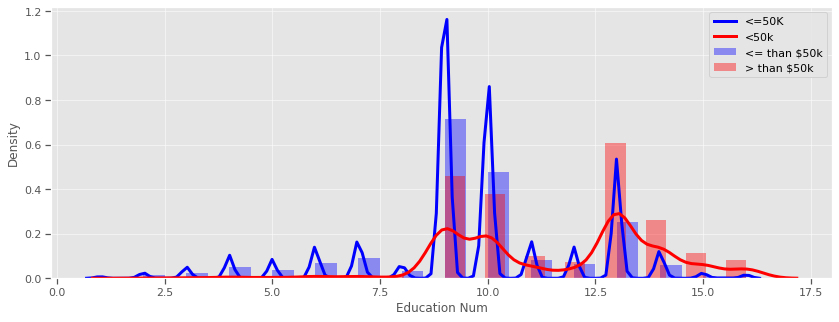

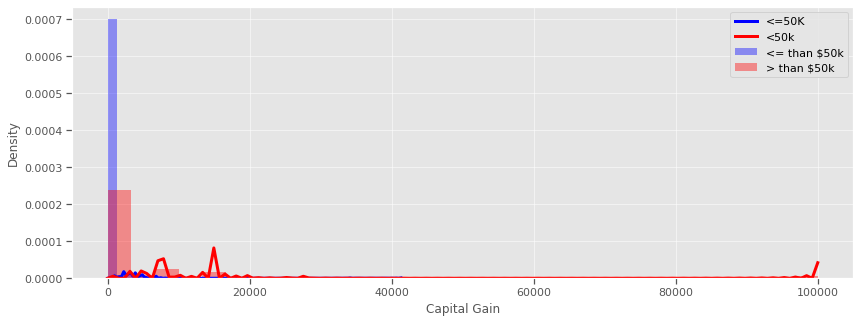

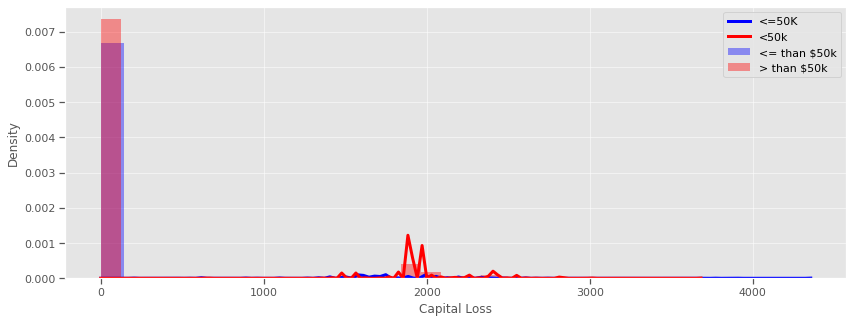

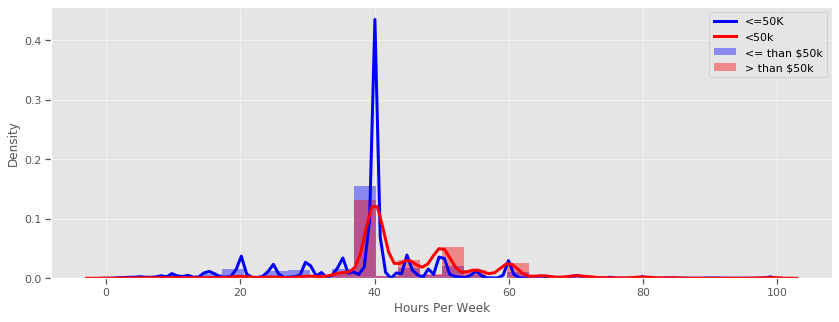

In [151]:
#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
for col in numcols:
    plt.figure(figsize=(14,5))
    plt.style.use('seaborn-colorblind')
    sns.set_context("notebook")
    plt.grid(True, alpha=0.5)
#     sns.kdeplot(df.loc[df['Income'] == ' <=50K', col], label = '<= than $50k')
#     sns.kdeplot(df.loc[df['Income'] == ' >50K', col], label = '> than $50k')
    sns.distplot(df.loc[df['Income'] == ' <=50K', col], label = '<= than $50k',bins=30, kde_kws={"color": "b", "lw": 3, "label": "<=50K"}, hist_kws={"color": "b", "label": "<=50K"} )
    sns.distplot(df.loc[df['Income'] == ' >50K', col], label = '> than $50k',bins=30, kde_kws={"color": "r", "lw": 3, "label": "<50k"},  hist_kws={"color": "r", "label": "<50k"}) 
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


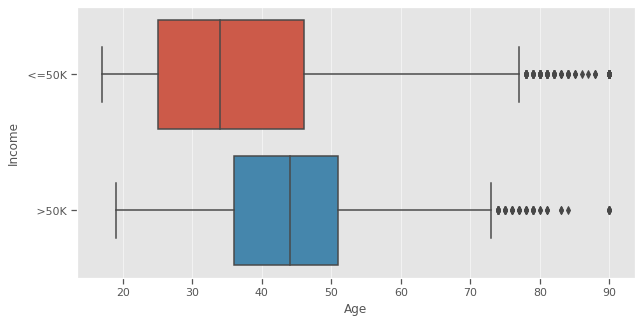

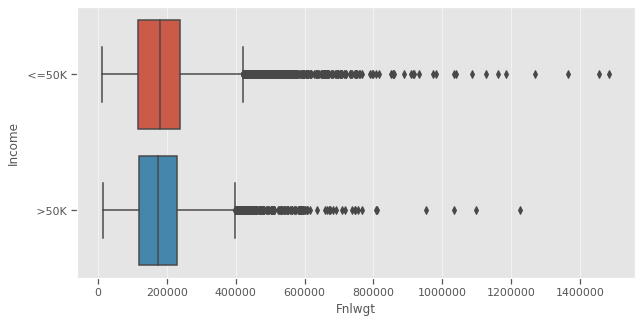

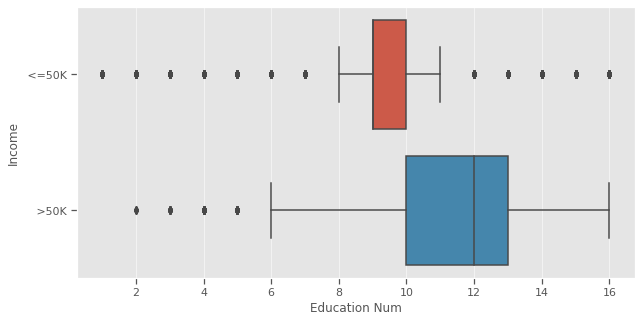

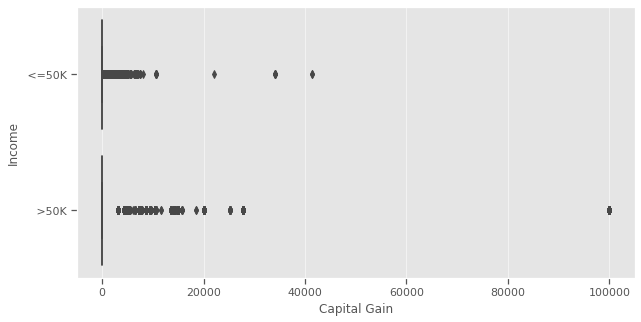

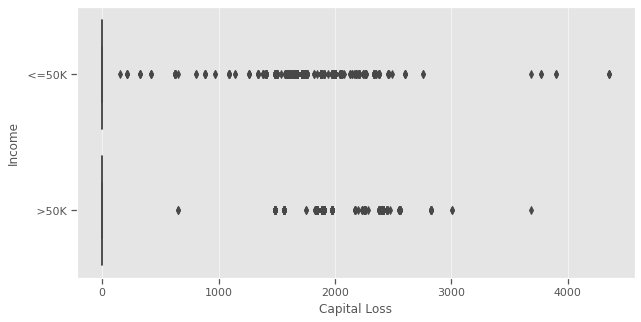

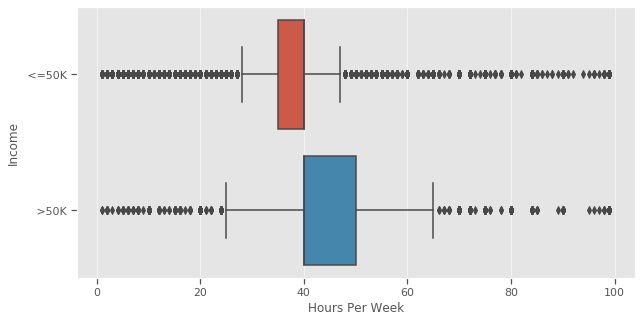

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in numcols:
    plt.figure(figsize=(10,5))
    plt.style.use('ggplot')
    sns.set_context("notebook")
    plt.grid(True, alpha=0.5)
#     sns.boxplot(x= 'Income', y=col, data = df)
    sns.boxplot(y= 'Income', x=col, data = df)
    #sns.ditplot(df.loc[df['Income'] == ' <=50K', col], label = '> than $50k', kde=True,
    plt.xlabel(col)
    plt.ylabel("Income")
    #plt.legend()
    plt.show()
#     plt.title(col, ' by Income Status');

In [71]:
#function to find percentage of ? values / attribute
for col in df.columns:
#     print(col)
    total = df[col].count()

    vals = df[col].value_counts()
    dic_vals = vals.to_dict()
#     print(dic_vals)
    for k,v in dic_vals.items():
        if k == ' ?':
            missing = v
            print(col)
            print("Percentage of missing values: ", (missing/total) * 100)
            

Workclass
Percentage of missing values:  5.6429800835997055
Occupation
Percentage of missing values:  5.66449471354807
Native Country
Percentage of missing values:  1.7887878042783376


In [83]:
# native country attribute percentage breakdown
vals = df['Native Country'].value_counts()
total = df['Native Country'].count()
dic_vals = vals.to_dict()
# for k,v in dic_vals.items():
#     print(k, ": ", (v / total) * 100)
    
# feature engineering for countries with percentage < 1% 
other = 0
for k,v in dic_vals.items():
    percent = (v / total) * 100  
    if percent >= 1.0:
        print(k, ": ", (v / total) * 100)
    else:
        other += v
print("Other: ", (other / total) * 100)



 United-States :  89.5992131792476
 Mexico :  1.963978362429309
 ? :  1.7887878042783376
Other:  6.648020654044751


In [112]:
#one hot encoding ->ideal for logisitc regression model
df_OHE = df
for cols in catcols[:-1]:
    dummy = pd.get_dummies(df_OHE[cols]) #get ones for each feature
    df_OHE = pd.concat([df_OHE, pd.get_dummies(df_OHE[cols])], axis = 1)
    df_OHE.drop([cols], axis = 1, inplace = True)
df_OHE.head()


,Age,Fnlwgt,Education Num,Capital Gain,Capital Loss,Hours Per Week,Income,?,Federal-gov,Local-gov,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,50,83311,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
#binary encoding -- >ideal for decision tree and naive bayes
import category_encoders as ce
df_BE = df
for col in catcols[:-1]:
    encoder = ce.BinaryEncoder(cols=[col]) #get ones for each feature
    df_BE = encoder.fit_transform(df_BE) #merge to dataset
df_BE.shape
df_BE.head()


,Age,Workclass_0,Workclass_1,Workclass_2,Workclass_3,Workclass_4,Fnlwgt,Education_0,Education_1,Education_2,...,Capital Loss,Hours Per Week,Native Country_0,Native Country_1,Native Country_2,Native Country_3,Native Country_4,Native Country_5,Native Country_6,Income
0,50,0,0,0,0,1,83311,0,0,0,...,0,13,0,0,0,0,0,0,1,<=50K
1,38,0,0,0,1,0,215646,0,0,0,...,0,40,0,0,0,0,0,0,1,<=50K
2,53,0,0,0,1,0,234721,0,0,0,...,0,40,0,0,0,0,0,0,1,<=50K
3,28,0,0,0,1,0,338409,0,0,0,...,0,40,0,0,0,0,0,1,0,<=50K
4,37,0,0,0,1,0,284582,0,0,1,...,0,40,0,0,0,0,0,0,1,<=50K


Name columns and preprocess some of the data inside the DF

Preprocessing Key:

age: continuous.
<br>
workclass: Private : 0 , Self-emp-not-inc : 1 , Self-emp-inc : 2 , Federal-gov : 3, Local-gov : 4, State-gov : 5, Without-pay : 6, Never-worked : 7.
<br>
fnlwgt: continuous.
<br>
education: Bachelors : 0, Some-college : 1, 11th : 2, HS-grad : 3, Prof-school : 4, Assoc-acdm : 5, Assoc-voc : 6, 9th : 7, 7th-8th : 8, 12th : 9, Masters : 10, 1st-4th : 11, 10th : 12, Doctorate : 13, 5th-6th : 14, Preschool : 15.
<br>
education-num: continuous.
<br>
marital-status: Married-civ-spouse : 0, Divorced : 1, Never-married : 2, Separated : 3, Widowed : 4, Married-spouse-absent : 5, Married-AF-spouse : 6.
<br>
occupation: Tech-support : 0, Craft-repair : 1, Other-service : 2, Sales : 3, Exec-managerial : 4, Prof-specialty : 5, Handlers-cleaners : 6, Machine-op-inspct : 7, Adm-clerical : 8, Farming-fishing : 9, Transport-moving : 10, Priv-house-serv : 11, Protective-serv : 12, Armed-Forces : 13.
<br>
relationship: Wife : 0 , Own-child : 1 , Husband : 2, Not-in-family : 3, Other-relative : 4, Unmarried : 5.
<br>
race: White : 0, Asian-Pac-Islander : 1, Amer-Indian-Eskimo : 2, Other : 3, Black : 4.
<br>
sex: Female : 0, Male : 1.
<br>
capital-gain: continuous.
<br>
capital-loss: continuous.
<br>
hours-per-week: continuous.
<br>
native-country: United-States : 0, Cambodia : 1, England : 2, Puerto-Rico : 3, Canada : 4, Germany : 5, Outlying-US(Guam-USVI-etc) : 6, India : 7, Japan : 8, Greece : 9, South : 10, China : 11, Cuba : 12, Iran : 13, Honduras : 14, Philippines : 15, Italy : 16, Poland : 17, Jamaica : 18, Vietnam : 19, Mexico : 20, Portugal : 21, Ireland : 22, France : 23, Dominican-Republic : 24, Laos : 25, Ecuador : 26, Taiwan : 27, Haiti : 28, Columbia : 29, Hungary : 30, Guatemala : 31, Nicaragua : 32, Scotland : 33, Thailand : 34, Yugoslavia : 35, El-Salvador : 36, Trinadad&Tobago : 37, Peru : 38, Hong : 39, Holand-Netherlands : 40.
<br>

In [96]:
colnames = [
    "Age",
    "Workclass",
    "Fnlwgt",
    "Education",
    "Education Num",
    "Marital Status",
    "Occupation",
    "Relationship",
    "Race",
    "Sex",
    "Capital Gain",
    "Capital Loss",
    "Hours Per Week",
    "Native Country",
    "Income"
]

dataframe.columns = colnames

workclass_repl = {
    " Private" : 0, 
    " Self-emp-not-inc" : 1, 
    " Self-emp-inc" : 2,
    " Federal-gov" : 3, 
    " Local-gov" : 4,
    " State-gov" : 5,
    " Without-pay" : 6,
    " Never-worked" : 7,
    " ?" : np.nan
}

dataframe["Workclass"] = [workclass_repl[item] for item in dataframe["Workclass"]]

education_repl = { " Bachelors" : 0, " Some-college" : 1, " 11th" : 2, " HS-grad" : 3, " Prof-school" : 4, " Assoc-acdm" : 5, " Assoc-voc" : 6, " 9th" : 7, " 7th-8th" : 8, " 12th" : 9, " Masters" : 10, " 1st-4th" : 11, " 10th" : 12, " Doctorate" : 13, " 5th-6th" : 14, " Preschool" : 15 }
dataframe["Education"] = [education_repl[item] for item in dataframe["Education"]]

marital_repl = {" Married-civ-spouse" : 0, " Divorced" : 1, " Never-married" : 2, " Separated" : 3, " Widowed" : 4, " Married-spouse-absent" : 5, " Married-AF-spouse" : 6 }
dataframe["Marital Status"] = [marital_repl[item] for item in dataframe["Marital Status"]]

occupation_repl = { " ?" : np.nan, " Tech-support" : 0, " Craft-repair" : 1, " Other-service" : 2, " Sales" : 3, " Exec-managerial" : 4, " Prof-specialty" : 5, " Handlers-cleaners" : 6, " Machine-op-inspct" : 7, " Adm-clerical" : 8, " Farming-fishing" : 9, " Transport-moving" : 10, " Priv-house-serv" : 11, " Protective-serv" : 12, " Armed-Forces" : 13 }
dataframe["Occupation"] = [occupation_repl[item] for item in dataframe["Occupation"]]

relationship_repl = { " ?" : np.nan, " Wife" : 0 , " Own-child" : 1 , " Husband" : 2, " Not-in-family" : 3, " Other-relative" : 4, " Unmarried" : 5 }
dataframe["Relationship"] = [relationship_repl[item] for item in dataframe["Relationship"]]

race_repl = { " ?" : np.nan, " White" : 0, " Asian-Pac-Islander" : 1, " Amer-Indian-Eskimo" : 2, " Other" : 3, " Black" : 4 }
dataframe["Race"] = [race_repl[item] for item in dataframe["Race"]]

sex_repl = { " ?" : np.nan, " Female" : 0, " Male" : 1 }
dataframe["Sex"] = [sex_repl[item] for item in dataframe["Sex"]]

country_repl = { " ?" : np.nan, " United-States" : 0, " Cambodia" : 1, " England" : 2, " Puerto-Rico" : 3, " Canada" : 4, " Germany" : 5, " Outlying-US(Guam-USVI-etc)" : 6, " India" : 7, " Japan" : 8, " Greece" : 9, " South" : 10, " China" : 11, " Cuba" : 12, " Iran" : 13, " Honduras" : 14, " Philippines" : 15, " Italy" : 16, " Poland" : 17, " Jamaica" : 18, " Vietnam" : 19, " Mexico" : 20, " Portugal" : 21, " Ireland" : 22, " France" : 23, " Dominican-Republic" : 24, " Laos" : 25, " Ecuador" : 26, " Taiwan" : 27, " Haiti" : 28, " Columbia" : 29, " Hungary" : 30, " Guatemala" : 31, " Nicaragua" : 32, " Scotland" : 33, " Thailand" : 34, " Yugoslavia" : 35, " El-Salvador" : 36, " Trinadad&Tobago" : 37, " Peru" : 38, " Hong" : 39, " Holand-Netherlands" : 40 }
dataframe["Native Country"] = [country_repl[item] for item in dataframe["Native Country"]]

income_repl = { " ?" : np.nan, " <=50K" : 0, " >50K" : 1 }
dataframe["Income"] = [income_repl[item] for item in dataframe["Income"]]

#First drop NA values
dataframe = dataframe.dropna()
dataframe

KeyError: 1.0

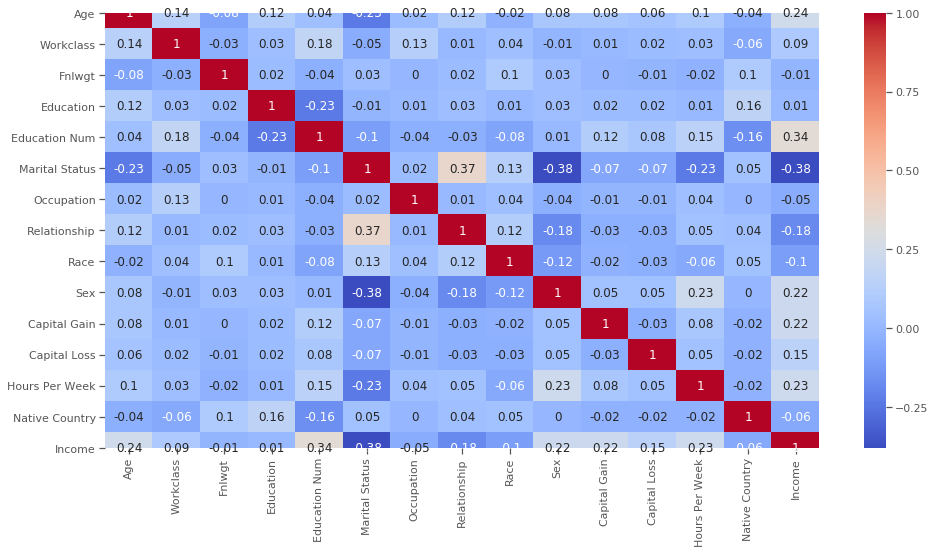

In [129]:
plt.figure(figsize=(16, 8))
sns.heatmap(round(dataframe.corr(), 2),cmap='coolwarm',annot=True)

Generate Test/Train split

In [4]:
size = dataframe.values.shape[1] - 1

#attributes not including prediction label
X = dataframe.values[:, :size]
#prediction label
Y = dataframe.values[:, size:]

x_train = X[:20000, :] #~70/30 split
x_test  = X[20000:, :]
y_train = Y[:20000, :]
y_test  = Y[20000:, :]

y_train = y_train.ravel()
y_test  = y_test.ravel()

1. A method to select rows in the dataset where a feature we specify equals a value we pass to the function.
2. A method to compute error given a set of predicted labels and a set of true labels

In [5]:
def split_on_val_eq(X_test, Y_test, column, val):
    ## TYPE ANSWER HERE 
    X0_test = []
    X1_test = []
    Y0_test = []
    Y1_test = []
    
    for ind in range(0, X_test.shape[0]):
        if X_test[ind][column] == val:
            X0_test.append(X_test[ind])
            Y0_test.append(Y_test[ind])
        else:
            X1_test.append(X_test[ind])
            Y1_test.append(Y_test[ind])
    
    return (X0_test, X1_test, Y0_test, Y1_test)

def error(y, y_hat):
    count = 0
    total_instances = len(y)
    
    def check(elem):
        nonlocal count
        cond = elem != y_hat[count]
        count += 1
        return cond
    
    total_error = len(list(filter(check, y)))
    
    return total_error / total_instances

## INPUTS:
# y - true labels
# y_hat - predicted labels
def accuracy(y, y_hat):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    
    for x in range(0, len(y)):
        if y[x] == 1 and y_hat[x] == 1:
            tp += 1
        elif y[x] == 0 and y_hat[x] == 1:
            fp += 1
        elif y[x] == 0 and y_hat[x] == 0:
            tn += 1
        elif y[x] == 1 and y_hat[x] == 0:
            fn += 1
    
    return (tp + tn) / (tp + tn + fp + fn)

def false_negatives(y, y_hat):
    result = 0
    for x in range(0, len(y)):
        if y[x] == 1 and y_hat[x] == 0:
            result += 1
    return result

Import sklearn and initialize decision tree/logreg solvers

In [8]:
from sklearn import linear_model, tree
%matplotlib inline
import matplotlib.pyplot as plt

dt = tree.DecisionTreeClassifier(max_depth=5)
logreg = linear_model.LogisticRegression(solver='liblinear')

Check error for different sample sizes on logreg and dt models. Decision tree appears to give the most accurate results (at a depth of 5).

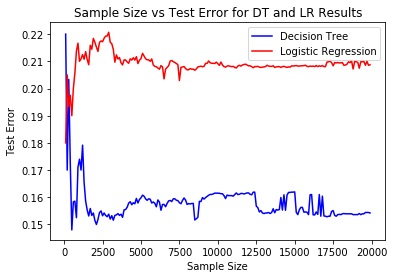

In [10]:
plot_data_dt = {"sample_size": [], "test_error": []}
plot_data_lg = {"sample_size": [], "test_error": []}

for n in range(100, 20000, 100):
    n_rows_x = x_train[:n, :]
    n_rows_y = y_train[:n]
    
    model_dt = dt.fit(n_rows_x, n_rows_y)
    model_lg = logreg.fit(n_rows_x, n_rows_y)

    pred_dt  = model_dt.predict(x_test)
    pred_logreg  = model_lg.predict(x_test)
    
    plot_data_dt["sample_size"].append(n)
    plot_data_dt["test_error"].append(error(y_test[:n], pred_dt))
    
    plot_data_lg["sample_size"].append(n)
    plot_data_lg["test_error"].append(error(y_test[:n], pred_logreg))
    
plt.title('Sample Size vs Test Error for DT and LR Results')
plt.xlabel('Sample Size')
plt.ylabel('Test Error')
    
plt.plot(plot_data_dt["sample_size"], plot_data_dt["test_error"], color='blue', label='Decision Tree')
plt.plot(plot_data_lg["sample_size"], plot_data_lg["test_error"], color='red', label='Logistic Regression')
plt.legend()

plt.show()

Split on rows where sex = male/female and compute error
<br>
First show accuracy with logistic regression model

In [14]:
model = logreg.fit(x_train, y_train)

(femaleX, _, femaleY, _) = split_on_val_eq(x_test, y_test, 9, 0)
(maleX, _, maleY, _) = split_on_val_eq(x_test, y_test, 9, 1)

pred_male = model.predict(maleX)
pred_female = model.predict(femaleX)

err_male = accuracy(maleY, pred_male)
err_female = accuracy(femaleY, pred_female)

print("Total female: " + str(len(femaleX)))
print("Total male: " + str(len(maleX)))

print("Accuracy when sex = male: " + str(err_male))
print("Accuracy when sex = female: " + str(err_female))
print("# of False Negatives when sex = female: " + str(false_negatives(femaleY, pred_female)))
print("# of False Negatives when sex = male: " + str(false_negatives(maleY, pred_male)))

Total female: 3291
Total male: 6870
Accuracy when sex = male: 0.74235807860262
Accuracy when sex = female: 0.8896991795806746
# of False Negatives when sex = female: 274
# of False Negatives when sex = male: 1610


Now show details with decision tree model

In [15]:
model = dt.fit(x_train, y_train)

(femaleX, _, femaleY, _) = split_on_val_eq(x_test, y_test, 9, 0)
(maleX, _, maleY, _) = split_on_val_eq(x_test, y_test, 9, 1)

pred_male = model.predict(maleX)
pred_female = model.predict(femaleX)

err_male = accuracy(maleY, pred_male)
err_female = accuracy(femaleY, pred_female)

print("Total female: " + str(len(femaleX)))
print("Total male: " + str(len(maleX)))

print("Accuracy when sex = male: " + str(err_male))
print("Accuracy when sex = female: " + str(err_female))
print("# of False Negatives when sex = female: " + str(false_negatives(femaleY, pred_female)))
print("# of False Negatives when sex = male: " + str(false_negatives(maleY, pred_male)))

Total female: 3291
Total male: 6870
Accuracy when sex = male: 0.8119359534206696
Accuracy when sex = female: 0.9164387724096019
# of False Negatives when sex = female: 229
# of False Negatives when sex = male: 1027


Above shows there is ~7% increase in accuracy for male individuals and ~2% increase in accuracy for females. Also, using a decision tree model, we've reduced the number of false negatives for both sexes.